In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [24]:
#Used to convert the image to a tensor
# a tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space.
#the tensor is then normalised (setting values between 0 and 1)
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Importing the test and train datasets and applies the transformation
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

#DataLoader wraps an iterable around the Dataset to enable easy access to the samples
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = True, num_workers = 2)

#Classes of the target variable (y) instead of having a 0 - 9 
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


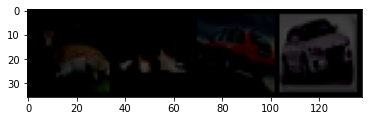

 deer   dog   car   car


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 * 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, lables = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[lables[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
for epoch in range(2):
    running_loss = 0.0
    for i , data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f'%
            (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

cpu
[1,  2000] loss: 2.203
[1,  4000] loss: 1.904
[1,  6000] loss: 1.682
[1,  8000] loss: 1.589
[1, 10000] loss: 1.510
[1, 12000] loss: 1.482
[2,  2000] loss: 1.403
[2,  4000] loss: 1.370
[2,  6000] loss: 1.329
[2,  8000] loss: 1.307
[2, 10000] loss: 1.275
[2, 12000] loss: 1.278
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


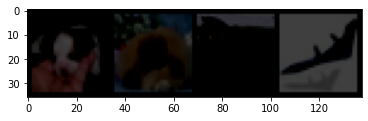

Ground Truth:    dog   dog horse plane


In [8]:
dataiter = iter(testloader)
images, lables = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[lables[j]] for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  horse horse horse plane


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, lables = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total +=lables.size(0)
        correct += (predicted==lables).sum().item()

print(correct)
print("accuracy of the network on test images: %d %%" %(100 * correct/ total))

5674
accuracy of the network on test images: 56 %


In [14]:
print(total)

10000
